# Import des bibliothèques et du train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from statistics import *
import pylab 
import scipy.stats as stats

In [2]:
pd.read_csv('train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


On remarque qu'il y a 1460 lignes et 81 colonnes

 # Signification de chaque colonne  

In [4]:
df= pd.read_csv('train.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Création du notebook avec un titre et importer train.csv dans un dataframe

In [ ]:
df= pd.read_csv('train.csv')

# Analyse exploratoire 
## moyenne, ecart-type, médiane 

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Exemple avec la variable GarageCond, TA = note moyenne

In [6]:
df.GarageCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

## Identification des valeurs manquantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Suppression des variables dont des valeurs sont manquantes

In [9]:
df.drop(["Alley","MiscFeature","Fence","PoolQC","FireplaceQu"],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Analyse de la variable sélectionné

In [10]:
df["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

On remarque que la moyenne est plus elevé que la médiane, il y aura certainement des valeurs extremes

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

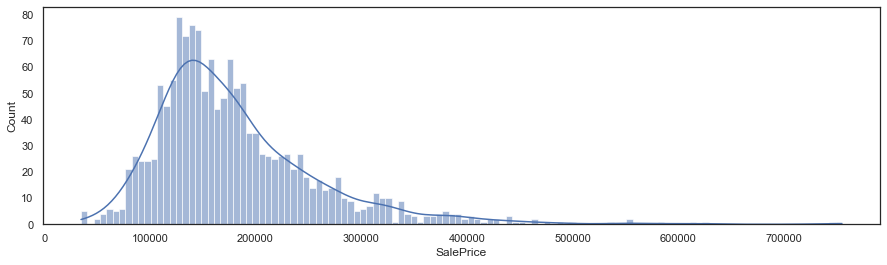

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.histplot(data=df, x="SalePrice", bins=120, kde=True)



On remarque que la distribution du prix de vente s'etend avec des valeurs extremes vers la droite ( prix sup)

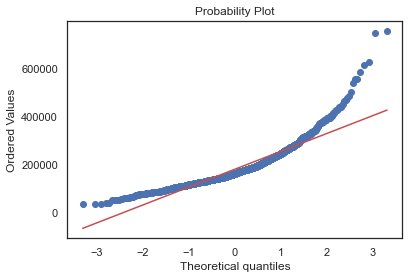

In [12]:
# Distribution des résidus (qqplot)
import pylab 
import scipy.stats as stats

stats.probplot(df["SalePrice"], dist="norm", plot=pylab)
pylab.show()

ça ne suit pas une loi normale car la distribution est trop etendue

### Affiche les corrélations les plus importantes



In [13]:
corr = df.corr()["SalePrice"][:-1]
df_filtre= abs(corr) >= 0.6
filtered_df = corr[df_filtre]
print(filtered_df)


OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


### Distribution des valeurs qualitatives

In [54]:
df.Heating

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1460, dtype: object

In [14]:
df_qual = df.select_dtypes(include = ['object'])
df_qual

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


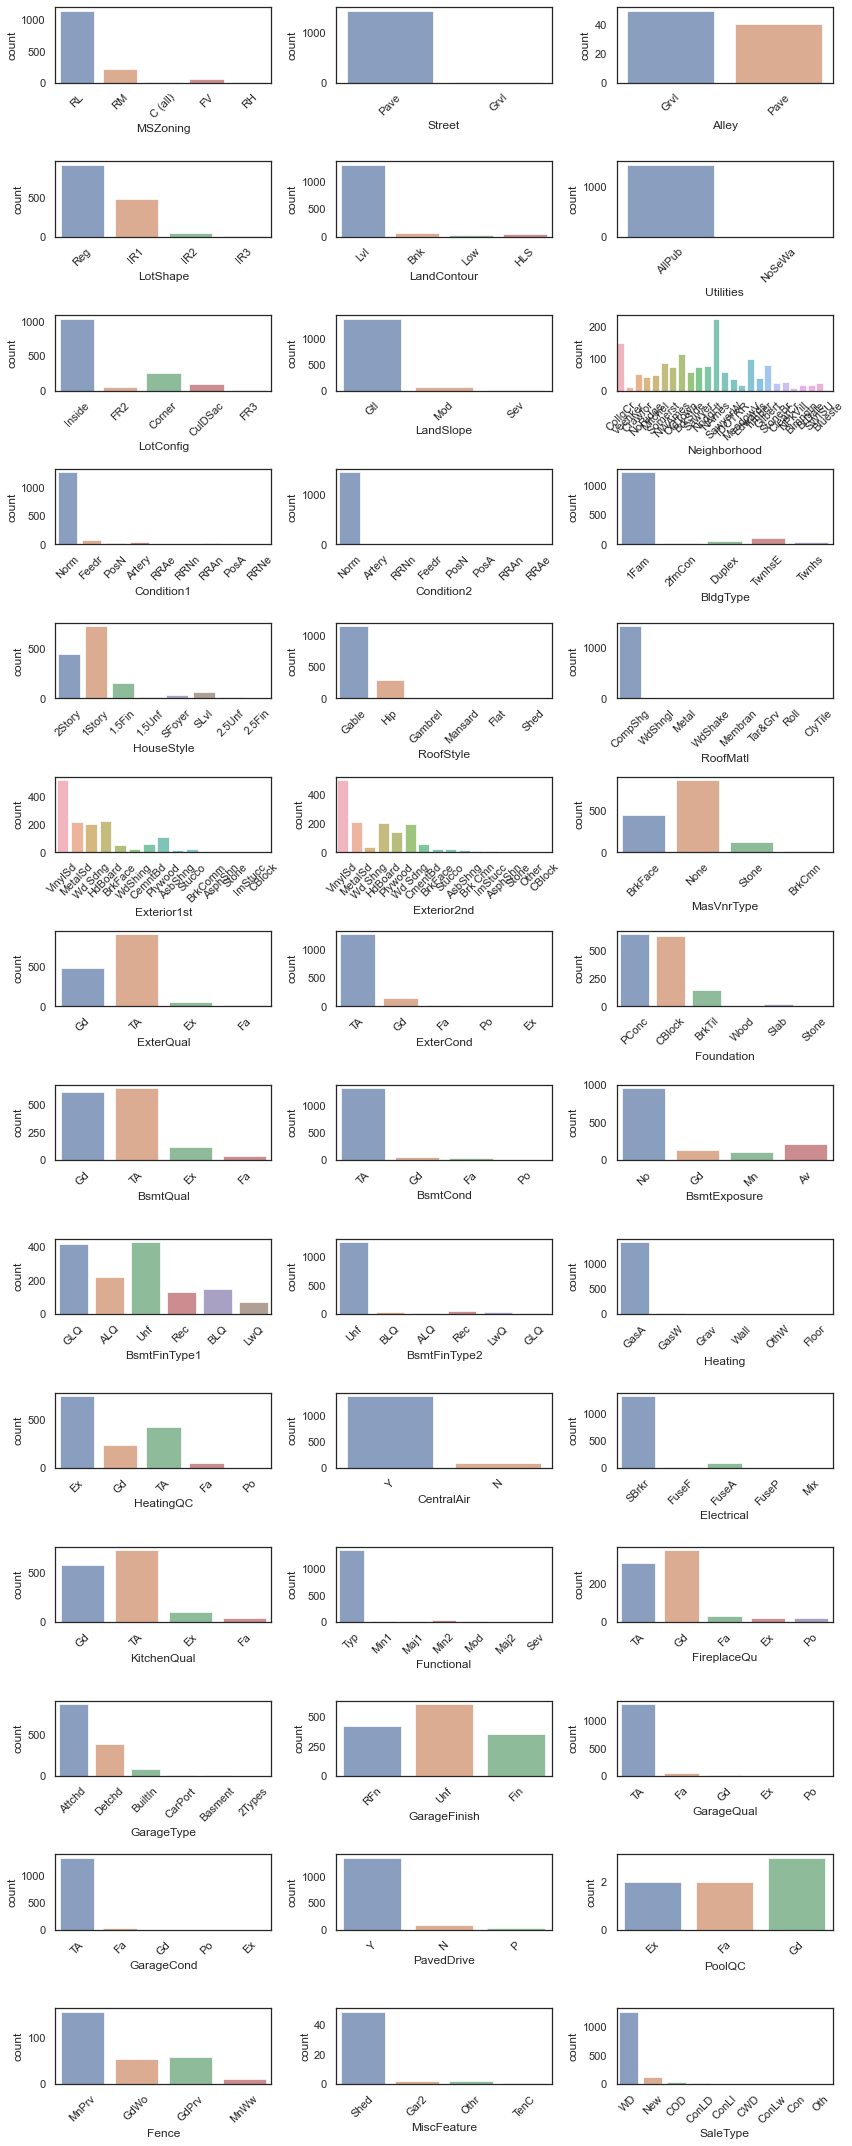

In [15]:
import warnings 

warnings.filterwarnings( "ignore")
fig, axes = plt.subplots(round(len(df_qual.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_qual.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_qual.columns[i], alpha=0.7, data=df_qual, ax=ax)

fig.tight_layout()

On remarque qu'il y a 2 types de variables qualitatives:
- Celles donnant un "score" de qualité quand à une feature par exemple GarageQual et que pour ces variables, la majorités des biens immobiliers sont de qualité TA ( moyenne selon la doc ), exception par exemple de la qualité du chauffage, jugée excelente pour une majorité
- Celles donnant une indiquation quant au type de la feature exemple "garagetype", ici rien ne me semble flagrant.

# regression lineaire avec StatsModel

In [16]:


# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('SalePrice ~ OverallQual', data=df).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.19e-313
Time:                        13:53:27   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

Le **R2 de 0.626** signifie que 62,56% de la variabilité des prix de ventes autour de leur moyenne est expliquée par notre modèle. Le reste est constitué des erreurs, considérées comme étant du bruit (à valider avec test de normalité des erreurs)
- L'**Intercept de -9.621e+04** 'signifie que pour une qualité de 0 le prix de ce modele serait de - -9.621e+04
- Le **coefficient de 4.544e+04** signifie que lorque la qualité augmente de 1 le prix augmente de 45 444 

#y= prix de ventes à prédire
#y= le coef * x - intercept

# Regression lineaire avec sklearn et interpreter les resultats

In [37]:
from sklearn.linear_model import LinearRegression

X = np.array(df["OverallQual"]).reshape(-1, 1)

y = df["SalePrice"]

reg = LinearRegression().fit(X, y)





In [38]:
reg.score(X, y)

0.6256518924621182

In [39]:
reg.coef_

array([45435.8025931])

In [34]:
reg.intercept_

-96206.07951476044

On remarque que les regressions avec Sklern et StatsModels donnent les même résultats

# Réalisation d' une prediction avec sklearn

In [21]:
reg.predict(np.array(7).reshape(-1, 1))

array([221844.53863694])

In [22]:
reg.predict(np.array(10).reshape(-1, 1))

array([358151.94641623])


#prix de vente = 45435.8025931 * 10 - 96206.07951476044

# Separer les données d'entrainement et données de test (test.csv)

In [44]:
from sklearn.model_selection import train_test_split

X = np.array(df["OverallQual"]).reshape(-1, 1)

y = df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

reg2 = LinearRegression().fit(X_train, y_train)

In [45]:
reg2.score(X_val, y_val)

0.6033500642085945

Le score est inférieur car le modèle est tester des données qu'il n'a jamais vu. Les données inconnues sont issus de la partie val elle même issus du train.csv 

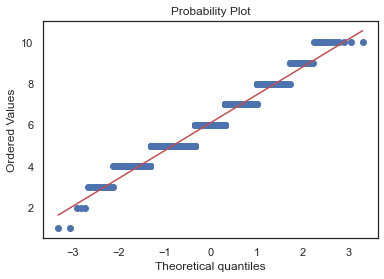

In [64]:
stats.probplot(df["OverallQual"], dist="norm", plot=pylab)
pylab.show()

# Ajouter une feature supplémentaire (qui vous semble pertinante) à votre model pour essayer d'ameliorer les performances de votre model

In [52]:
X = np.array(df[["OverallQual","GrLivArea"]])

y = df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

reg3 = LinearRegression().fit(X_train, y_train)


In [53]:
reg3.score(X_val, y_val)

0.6561373440067502

### on remarque que le score est supérieure avec le 2 variables que avec 1 variable.  Le choix des variables repose sur l'analyse des corrélations où sont sélectionné les plus fortes.

### On rajoute une variable catégorielle

In [74]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(df['Heating']).reshape(-1, 1)
enc.fit(X)
dfencode=pd.DataFrame(enc.transform(X).toarray())
dfencode

df2=pd.concat([df,dfencode],axis=1)
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,0,1,2,3,4,5
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,0.0,1.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,175000,0.0,1.0,0.0,0.0,0.0,0.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,210000,0.0,1.0,0.0,0.0,0.0,0.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,266500,0.0,1.0,0.0,0.0,0.0,0.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,142125,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
X = np.array(df2[["OverallQual","GrLivArea",0,1,2,3,4,5]])

y = df2["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

reg4 = LinearRegression().fit(X_train, y_train)

reg4.score(X_val, y_val)

0.6765384217301029

In [82]:
df2[["OverallQual","GrLivArea",0,1,2,3,4,5]]
df2.columns

Index([           'Id',    'MSSubClass',      'MSZoning',   'LotFrontage',
             'LotArea',        'Street',         'Alley',      'LotShape',
         'LandContour',     'Utilities',     'LotConfig',     'LandSlope',
        'Neighborhood',    'Condition1',    'Condition2',      'BldgType',
          'HouseStyle',   'OverallQual',   'OverallCond',     'YearBuilt',
        'YearRemodAdd',     'RoofStyle',      'RoofMatl',   'Exterior1st',
         'Exterior2nd',    'MasVnrType',    'MasVnrArea',     'ExterQual',
           'ExterCond',    'Foundation',      'BsmtQual',      'BsmtCond',
        'BsmtExposure',  'BsmtFinType1',    'BsmtFinSF1',  'BsmtFinType2',
          'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',       'Heating',
           'HeatingQC',    'CentralAir',    'Electrical',      '1stFlrSF',
            '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',  'BsmtFullBath',
        'BsmtHalfBath',      'FullBath',      'HalfBath',  'BedroomAbvGr',
        'KitchenAbvGr',  

# Prédire le test sur le test.csv

In [106]:
df_test=pd.read_csv('test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [107]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,0,1,2,3,4,5
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,6,2010,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,6,2010,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,3,2010,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,6,2010,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,1,2010,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,6,2006,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,4,2006,WD,Abnorml,0.0,1.0,0.0,0.0,0.0,0.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,9,2006,WD,Abnorml,0.0,1.0,0.0,0.0,0.0,0.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,7,2006,WD,Normal,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
X = np.array(df_test['Heating']).reshape(-1, 1)
dfencode=pd.DataFrame(enc.transform(X).toarray())
dfencode

df3=pd.concat([df_test,dfencode],axis=1)
X = np.array(df3[["OverallQual","GrLivArea",0,1,2,3,4,5]])
predict=reg4.predict(X)
predict



array([109049.70952494, 167206.80652357, 149876.04590582, ...,
       127318.52034749, 113171.33147881, 238619.93088735])

In [112]:
df3["predict"]=predict.round()
df3[["OverallQual","GrLivArea",0,1,2,3,4,5,"predict"]]

,OverallQual,GrLivArea,0,1,2,3,4,5,predict
0,5,896,0.0,1.0,0.0,0.0,0.0,0.0,109050.0
1,6,1329,0.0,1.0,0.0,0.0,0.0,0.0,167207.0
2,5,1629,0.0,1.0,0.0,0.0,0.0,0.0,149876.0
3,6,1604,0.0,1.0,0.0,0.0,0.0,0.0,182524.0
4,8,1280,0.0,1.0,0.0,0.0,0.0,0.0,232558.0
...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,1.0,0.0,0.0,0.0,0.0,85926.0
1455,4,1092,0.0,1.0,0.0,0.0,0.0,0.0,85926.0
1456,5,1224,0.0,1.0,0.0,0.0,0.0,0.0,127319.0
1457,5,970,0.0,1.0,0.0,0.0,0.0,0.0,113171.0
